In [147]:
import os
import datadotworld as dw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from pylab import rcParams
#sns.set_theme(style="darkgrid")

In [148]:
os.environ['DW_AUTH_TOKEN'] = ''

In [149]:
dataset = 'vlasvlasvlas/covid-19-argentina-data'

In [150]:
query = 'SELECT fecha, dia_inicio FROM covid19ardata_historico LIMIT 100'

In [151]:
df = dw.query(dataset, query).dataframe
df

,fecha,dia_inicio
0,2020-03-02,1
1,2020-03-03,2
2,2020-03-04,3
3,2020-03-05,4
4,2020-03-06,5
...,...,...
95,2020-03-24,20
96,2020-03-24,20
97,2020-03-24,20
98,2020-03-24,20


In [152]:
test_0 = 'SELECT * FROM covid19ardata_historico LIMIT 100'
test_1 = dw.query(dataset, test_0).dataframe

In [153]:
test_1.head(5)

,fecha,dia_inicio,dia_cuarentena_dnu260,osm_admin_level_2,osm_admin_level_4,osm_admin_level_8,tot_casosconf,nue_casosconf_diff,tot_fallecidos,nue_fallecidos_diff,tot_recuperados,tot_terapia,test_rt_pcr_negativos,test_rt_pcr_total,transmision_tipo,informe_tipo,informe_link,observacion,covid19argentina_admin_level_4
0,2020-03-02,1,None,Argentina,CABA,None,1,1,0,0,None,None,None,None,importado,None,https://www.infobae.com/coronavirus/2020/03/03...,no hay informe,capital-federal
1,2020-03-03,2,None,Argentina,Indeterminado,None,1,0,0,0,None,None,None,None,importado,None,None,no hay informe,no-data
2,2020-03-04,3,None,Argentina,Indeterminado,None,1,0,0,0,None,None,None,None,importado,None,None,no hay informe,no-data
3,2020-03-05,4,None,Argentina,Buenos Aires,None,2,1,2,2,None,None,None,None,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,buenos-aires
4,2020-03-06,5,None,Argentina,Indeterminado,None,2,0,2,0,None,None,None,None,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,no-data


In [154]:
test_1.tail()

,fecha,dia_inicio,dia_cuarentena_dnu260,osm_admin_level_2,osm_admin_level_4,osm_admin_level_8,tot_casosconf,nue_casosconf_diff,tot_fallecidos,nue_fallecidos_diff,tot_recuperados,tot_terapia,test_rt_pcr_negativos,test_rt_pcr_total,transmision_tipo,informe_tipo,informe_link,observacion,covid19argentina_admin_level_4
95,2020-03-24,20,4,Argentina,Santa Fe,Rafaela,383,1,10,0,None,None,None,None,transmision comunitaria,informe provincial,https://www.santafe.gob.ar/index.php/web/conte...,Santa Fe Parte Provincial no son novedades son...,santa-fe
96,2020-03-24,20,4,Argentina,Santa Fe,Roldán,384,1,10,0,None,None,None,None,transmision comunitaria,informe provincial,https://www.santafe.gob.ar/index.php/web/conte...,Santa Fe Parte Provincial no son novedades son...,santa-fe
97,2020-03-24,20,4,Argentina,La Pampa,None,385,1,10,0,None,None,None,None,transmision comunitaria,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,la-pampa
98,2020-03-24,20,4,Argentina,Neuquén,None,386,1,10,0,None,None,None,None,transmision comunitaria,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,neuquen
99,2020-03-24,20,4,Argentina,Santa Cruz,None,387,1,10,0,None,None,None,None,transmision comunitaria,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,santa-cruz


In [155]:
test_1.columns

Index(['fecha', 'dia_inicio', 'dia_cuarentena_dnu260', 'osm_admin_level_2',
       'osm_admin_level_4', 'osm_admin_level_8', 'tot_casosconf',
       'nue_casosconf_diff', 'tot_fallecidos', 'nue_fallecidos_diff',
       'tot_recuperados', 'tot_terapia', 'test_rt_pcr_negativos',
       'test_rt_pcr_total', 'transmision_tipo', 'informe_tipo', 'informe_link',
       'observacion', 'covid19argentina_admin_level_4'],
      dtype='object')

In [156]:
for i in test_1.columns:
    print(i)

fecha
dia_inicio
dia_cuarentena_dnu260
osm_admin_level_2
osm_admin_level_4
osm_admin_level_8
tot_casosconf
nue_casosconf_diff
tot_fallecidos
nue_fallecidos_diff
tot_recuperados
tot_terapia
test_rt_pcr_negativos
test_rt_pcr_total
transmision_tipo
informe_tipo
informe_link
observacion
covid19argentina_admin_level_4


In [157]:
data_select = '''
SELECT
    fecha, 
    dia_inicio, 
    dia_cuarentena_dnu260 as dia_cuarentena,
    osm_admin_level_4 as provincia, 
    osm_admin_level_8 as ciudad, 
    tot_casosconf,
    nue_casosconf_diff, 
    tot_fallecidos, 
    nue_fallecidos_diff,
    tot_recuperados, 
    tot_terapia, 
    test_rt_pcr_negativos,
    test_rt_pcr_total, 
    transmision_tipo, 
    informe_tipo, 
    informe_link, 
    covid19argentina_admin_level_4
FROM covid19ardata_historico
'''

In [158]:
results = dw.query(dataset, data_select)

In [159]:
df = results.dataframe

In [160]:
df_backup = results.dataframe

In [161]:
df_backup.to_csv('df_backup.csv', index=False)

In [162]:
df = pd.read_csv('df_backup.csv')

In [163]:
df.shape

(13917, 17)

In [164]:
df = df.fillna(0)
df = df.astype({'provincia': str, 'ciudad': str})
df = df.astype({'tot_casosconf': int,'tot_fallecidos': int,'dia_cuarentena': int, 'tot_casosconf': int})
df.dtypes

fecha                              object
dia_inicio                          int64
dia_cuarentena                      int32
provincia                          object
ciudad                             object
tot_casosconf                       int32
nue_casosconf_diff                float64
tot_fallecidos                      int32
nue_fallecidos_diff               float64
tot_recuperados                    object
tot_terapia                        object
test_rt_pcr_negativos             float64
test_rt_pcr_total                 float64
transmision_tipo                   object
informe_tipo                       object
informe_link                       object
covid19argentina_admin_level_4     object
dtype: object

C:\Users\Usuario\anaconda3\envs\covid_19\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning:

FixedFormatter should only be used together with FixedLocator



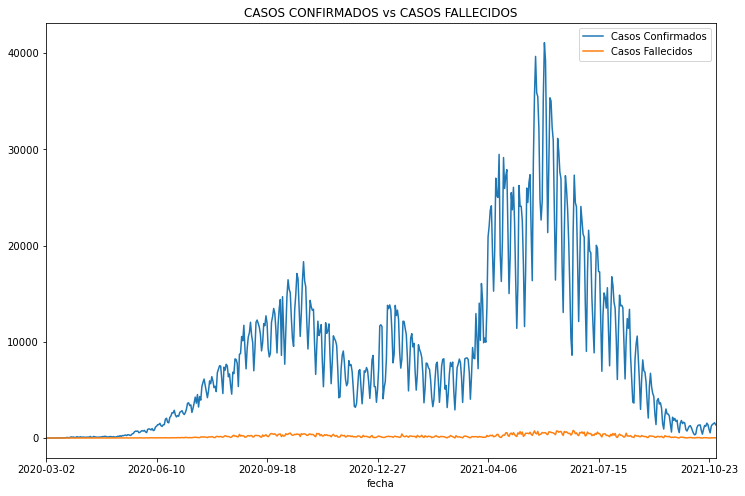

In [165]:
df_temp = df[(df["nue_fallecidos_diff"]<3000) & (df["nue_fallecidos_diff"]>=0)].copy()
df_to_plot = df_temp.groupby("fecha")[["nue_casosconf_diff", "nue_fallecidos_diff"]].sum()
df_to_plot.plot(figsize=(12, 8), title='CASOS CONFIRMADOS vs CASOS FALLECIDOS')
plt.legend(['Casos Confirmados','Casos Fallecidos'])
plt.show()

C:\Users\Usuario\anaconda3\envs\covid_19\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning:

FixedFormatter should only be used together with FixedLocator



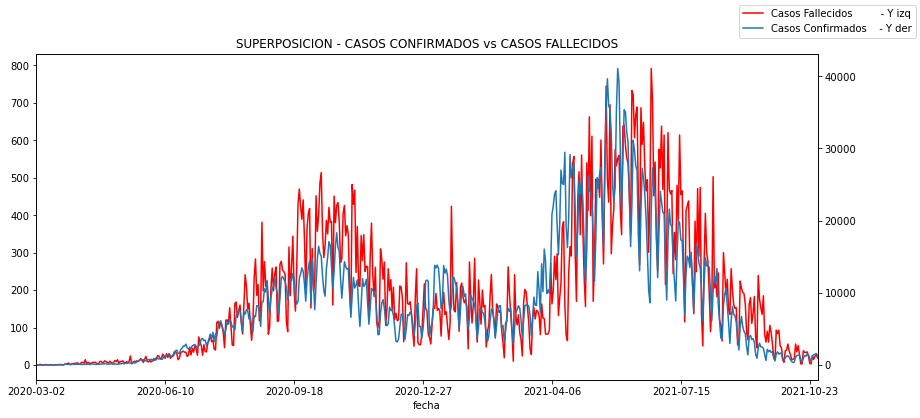

In [166]:
ax = df_to_plot.plot(y="nue_fallecidos_diff", legend=False, figsize=(14, 6), color="r", title='SUPERPOSICION - CASOS CONFIRMADOS vs CASOS FALLECIDOS')
ax2 = ax.twinx()
df_to_plot.plot(y="nue_casosconf_diff", ax=ax2, legend=False)
ax.figure.legend(['Casos Fallecidos         - Y izq','Casos Confirmados    - Y der'])
plt.show()

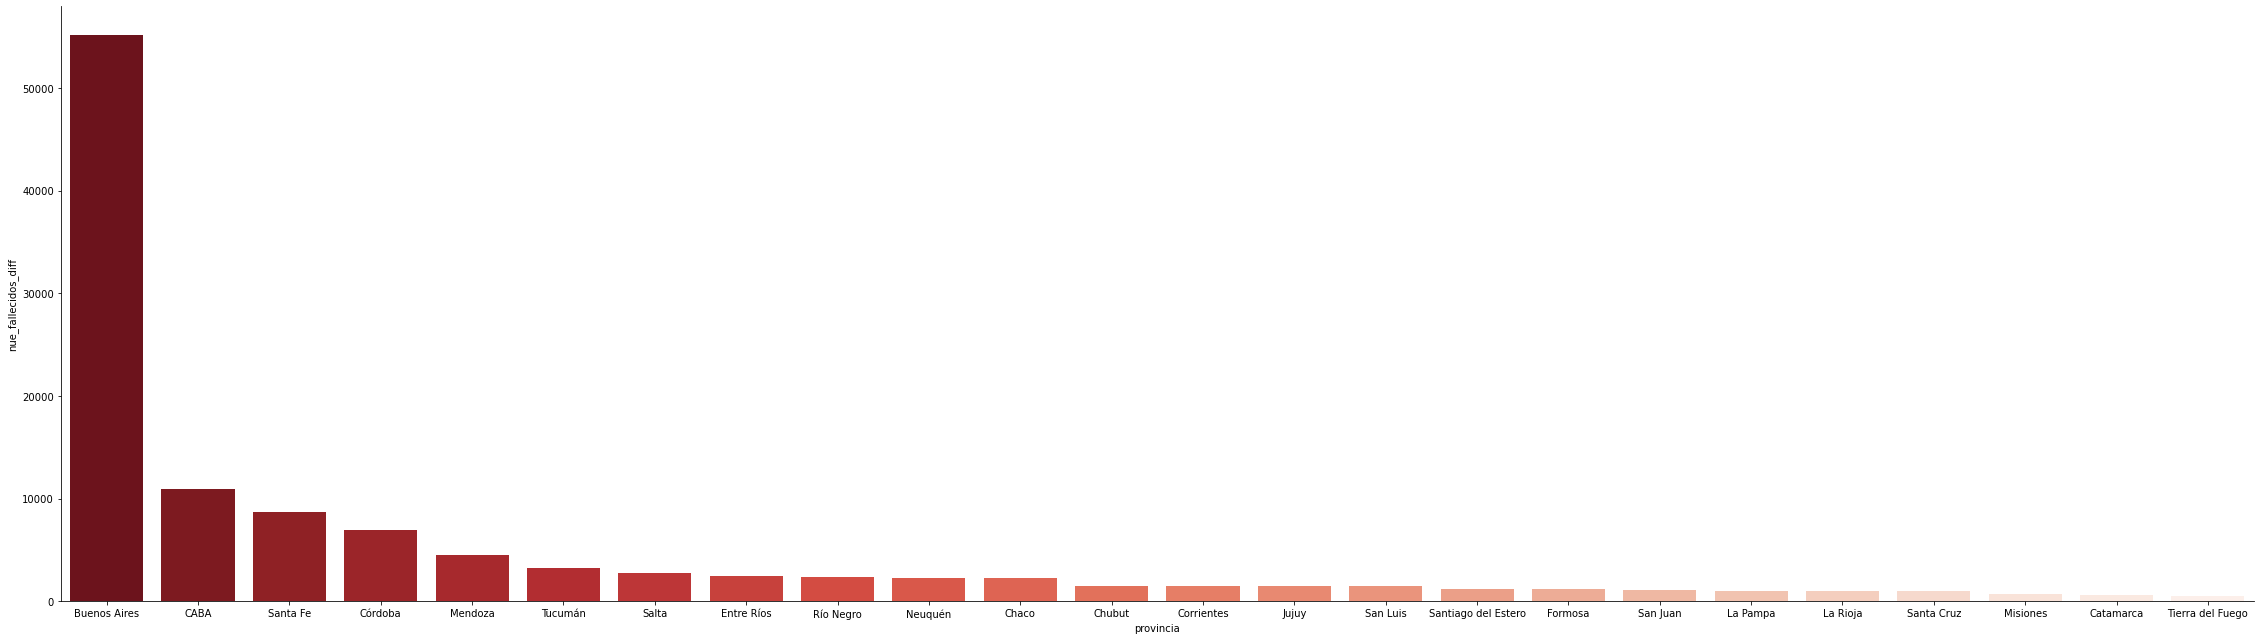

In [167]:
df_temp = df[df.provincia != "Indeterminado"].copy()
provincia = df_temp.groupby("provincia")[["nue_fallecidos_diff"]].sum()
df_to_plot = provincia.reset_index().sort_values(['nue_fallecidos_diff'], ascending=[False])
g = sns.catplot(x='provincia', y='nue_fallecidos_diff', 
                data=df_to_plot, 
                kind='bar', palette="Reds_r", 
                height=9, aspect=3.5)

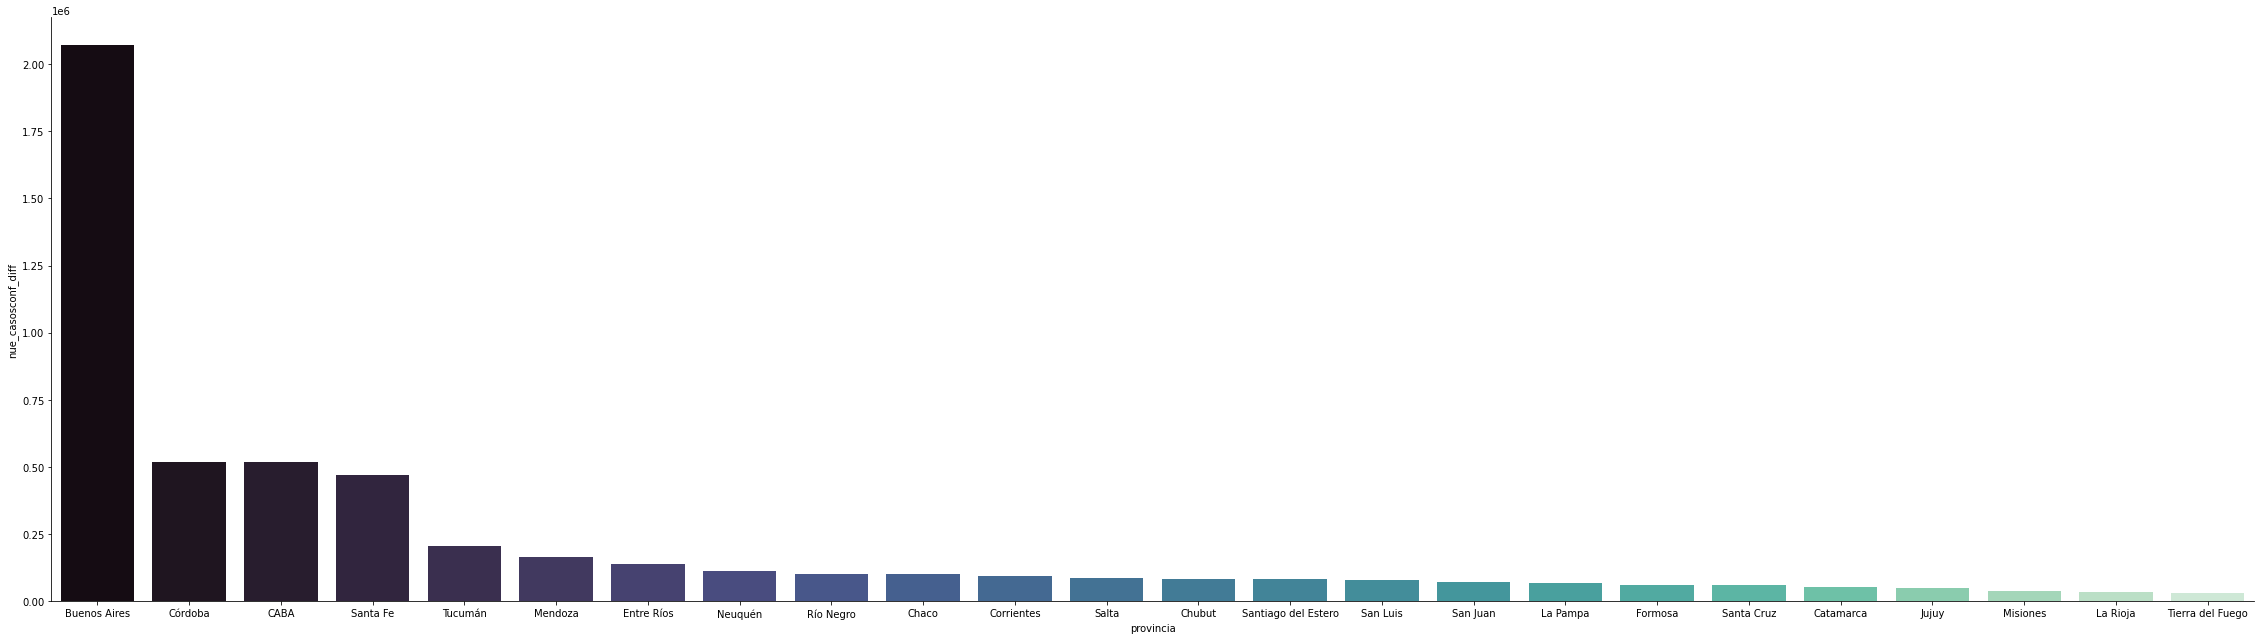

In [168]:
df_temp = df[df.provincia != "Indeterminado"].copy()
provincia = df_temp.groupby("provincia")[["nue_casosconf_diff"]].sum()
df_to_plot = provincia.reset_index().sort_values(['nue_casosconf_diff'], ascending=[False])
sns.color_palette("mako")
g = sns.catplot(x='provincia', y='nue_casosconf_diff', 
                data=df_to_plot, 
                kind='bar', palette="mako",
                height=9, aspect=3.5)

In [169]:
map_df = gpd.read_file("C:/Users/Usuario/Desktop/provincias/provincia.shp")
map_df.head()

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,globalid,...,escala,created_us,created_da,last_edite,last_edi_1,globalid_1,provincia_,shape_star,shape_stle,geometry
0,1,16251.0,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{4DBCF6F2-AF73-40A1-8634-02EB47B82700},1.0,0.020242,0.743806,POLYGON ((-58.34188739699994 -34.6310967159999...
1,2,16252.0,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{1F58EF44-45EE-4C10-A683-CC3AE303A25B},1.0,9.771811,21.515984,POLYGON ((-68.24999999999994 -37.5747846389999...
2,3,16253.0,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{D897577B-8EC5-4997-9CBD-0EBED84DE504},1.0,7.333771,14.490196,POLYGON ((-66.66178829699999 -31.9205360279999...
3,4,16254.0,0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{CE0E514A-EB01-4672-868D-5C822F9CA370},1.0,12.552838,20.852280,POLYGON ((-58.88082187799995 -28.0668248809999...
4,5,16255.0,0,Provincia,Provincia de La Rioja,Provincia,La Rioja,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{9D0FC6AF-9575-4EF8-9BED-6BF6C0045B90},1.0,8.529216,16.426132,POLYGON ((-65.42298521599997 -30.1196024849999...


In [171]:
map_df.nam = map_df.nam.str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(' ', '').str.replace('ciudadautonomadebuenosaires', 'caba')
map_df.head()

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,globalid,...,escala,created_us,created_da,last_edite,last_edi_1,globalid_1,provincia_,shape_star,shape_stle,geometry
0,1,16251.0,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,caba,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{4DBCF6F2-AF73-40A1-8634-02EB47B82700},1.0,0.020242,0.743806,POLYGON ((-58.34188739699994 -34.6310967159999...
1,2,16252.0,0,Provincia,Provincia del Neuquén,Provincia,neuquen,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{1F58EF44-45EE-4C10-A683-CC3AE303A25B},1.0,9.771811,21.515984,POLYGON ((-68.24999999999994 -37.5747846389999...
2,3,16253.0,0,Provincia,Provincia de San Luis,Provincia,sanluis,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{D897577B-8EC5-4997-9CBD-0EBED84DE504},1.0,7.333771,14.490196,POLYGON ((-66.66178829699999 -31.9205360279999...
3,4,16254.0,0,Provincia,Provincia de Santa Fe,Provincia,santafe,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{CE0E514A-EB01-4672-868D-5C822F9CA370},1.0,12.552838,20.852280,POLYGON ((-58.88082187799995 -28.0668248809999...
4,5,16255.0,0,Provincia,Provincia de La Rioja,Provincia,larioja,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{9D0FC6AF-9575-4EF8-9BED-6BF6C0045B90},1.0,8.529216,16.426132,POLYGON ((-65.42298521599997 -30.1196024849999...


In [172]:
df_temp = df[df.provincia != "Indeterminado"].copy()
provincia = df_temp.groupby("provincia")[["nue_fallecidos_diff"]].sum()
df_to_plot = provincia.reset_index().sort_values(['nue_fallecidos_diff'], ascending=[False])
df_to_plot.provincia = df_to_plot.provincia.str.replace(' ', '').str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_to_plot.head()

,provincia,nue_fallecidos_diff
0,buenosaires,55170.0
1,caba,10974.0
20,santafe,8707.0
6,cordoba,6929.0
12,mendoza,4551.0


In [175]:
provincia = df_temp.groupby("provincia")[["nue_fallecidos_diff", 'nue_casosconf_diff']].sum()

In [176]:
provincia['porcent'] = provincia['nue_fallecidos_diff']/provincia['nue_casosconf_diff'] * 100
provincia

,nue_fallecidos_diff,nue_casosconf_diff,porcent
provincia,,,
Buenos Aires,55170.0,2070305.0,2.664825
CABA,10974.0,517304.0,2.121383
Catamarca,578.0,51595.0,1.120264
Chaco,2290.0,100475.0,2.279174
Chubut,1534.0,83533.0,1.836400
Corrientes,1528.0,95033.0,1.607863
Córdoba,6929.0,518031.0,1.337565
Entre Ríos,2453.0,137081.0,1.789453
Formosa,1193.0,62155.0,1.919395


In [177]:
provincia = provincia.reset_index()

In [178]:
provincia['provincia'] = provincia['provincia'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace('ciudadautonomadebuenosaires', 'caba').str.replace(' ', '')

In [179]:
df = map_df.merge(provincia, left_on="nam", right_on="provincia", how="left")
df.head()

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,globalid,...,last_edi_1,globalid_1,provincia_,shape_star,shape_stle,geometry,provincia,nue_fallecidos_diff,nue_casosconf_diff,porcent
0,1,16251.0,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,caba,IGN,6.0,None,...,2021-07-21,{4DBCF6F2-AF73-40A1-8634-02EB47B82700},1.0,0.020242,0.743806,POLYGON ((-58.34188739699994 -34.6310967159999...,caba,10974.0,517304.0,2.121383
1,2,16252.0,0,Provincia,Provincia del Neuquén,Provincia,neuquen,IGN,6.0,None,...,2021-07-21,{1F58EF44-45EE-4C10-A683-CC3AE303A25B},1.0,9.771811,21.515984,POLYGON ((-68.24999999999994 -37.5747846389999...,neuquen,2303.0,113696.0,2.025577
2,3,16253.0,0,Provincia,Provincia de San Luis,Provincia,sanluis,IGN,6.0,None,...,2021-07-21,{D897577B-8EC5-4997-9CBD-0EBED84DE504},1.0,7.333771,14.490196,POLYGON ((-66.66178829699999 -31.9205360279999...,sanluis,1448.0,80526.0,1.798177
3,4,16254.0,0,Provincia,Provincia de Santa Fe,Provincia,santafe,IGN,6.0,None,...,2021-07-21,{CE0E514A-EB01-4672-868D-5C822F9CA370},1.0,12.552838,20.852280,POLYGON ((-58.88082187799995 -28.0668248809999...,santafe,8707.0,470222.0,1.851679
4,5,16255.0,0,Provincia,Provincia de La Rioja,Provincia,larioja,IGN,6.0,None,...,2021-07-21,{9D0FC6AF-9575-4EF8-9BED-6BF6C0045B90},1.0,8.529216,16.426132,POLYGON ((-65.42298521599997 -30.1196024849999...,larioja,994.0,33728.0,2.947106


In [180]:
df = df[~df['nam'].isin(['tierradelfuego,antartidaeislasdelatlanticosur'])].copy()

In [181]:
df['nue_casosconf_diff'] = df['nue_casosconf_diff'].fillna(0)
df['nue_fallecidos_diff'] = df['nue_fallecidos_diff'].fillna(0)
df['porcent'] = df['porcent'].fillna(0)

<AxesSubplot:>

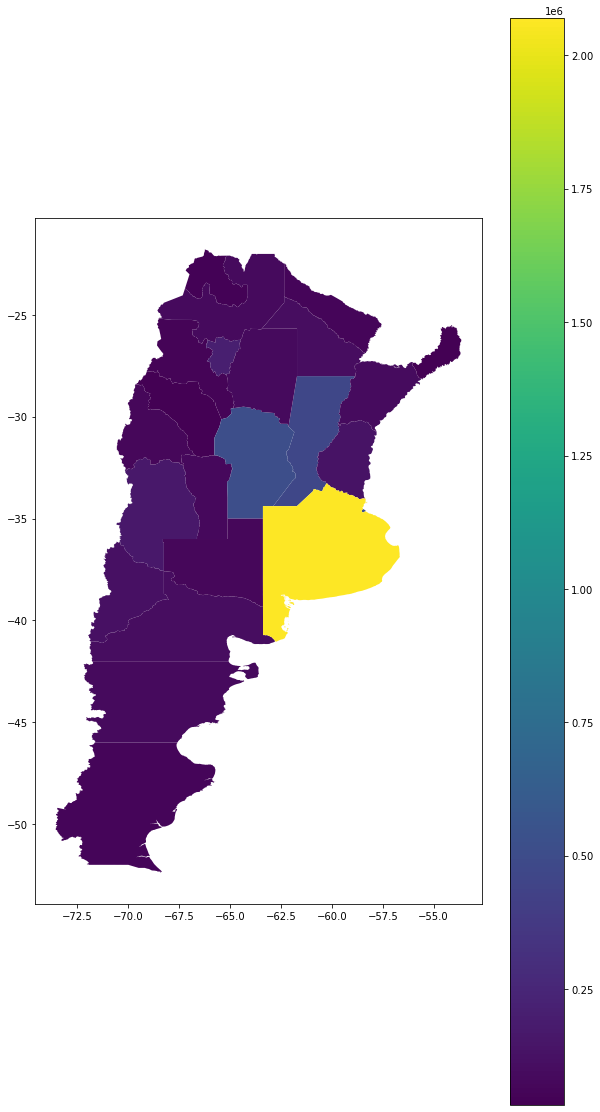

In [182]:
fig, ax = plt.subplots(1,1)
rcParams['figure.figsize'] = 10, 20

df.plot(column='nue_casosconf_diff', ax=ax, legend=True)


<AxesSubplot:>

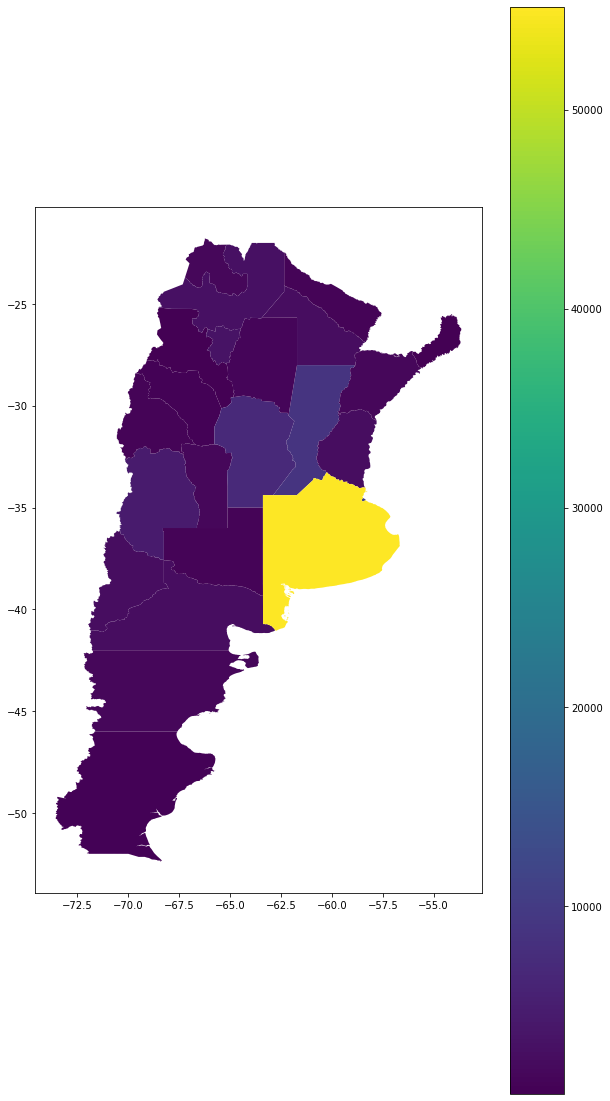

In [183]:
fig, ax = plt.subplots(1,1)
rcParams['figure.figsize'] = 10, 20

df.plot(column='nue_fallecidos_diff', ax=ax, legend=True)

<AxesSubplot:>

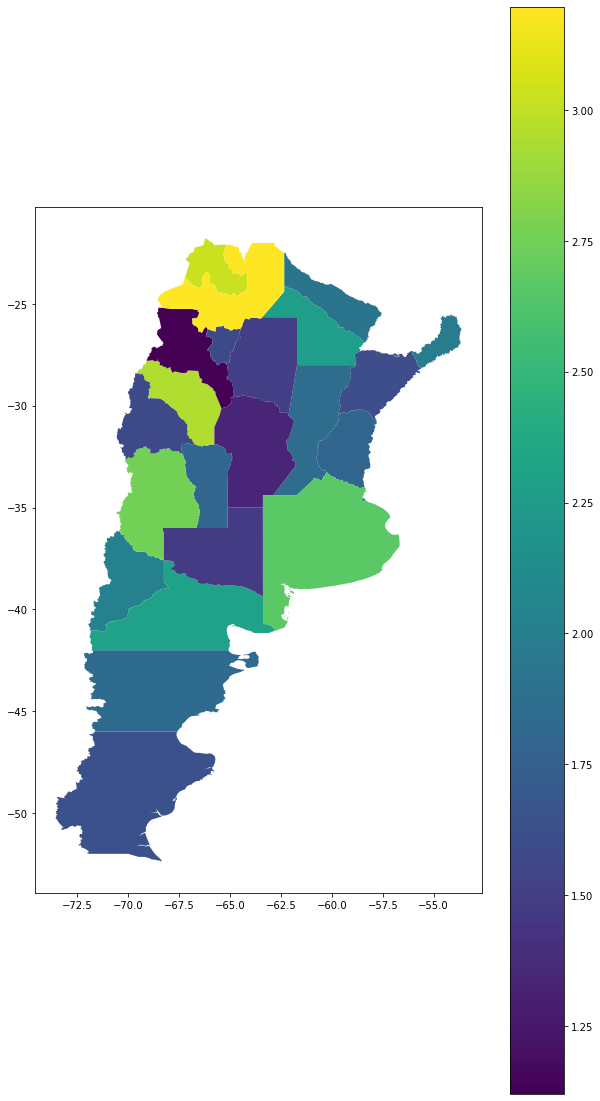

In [184]:
fig, ax = plt.subplots(1,1)
rcParams['figure.figsize'] = 10, 20

df.plot(column='porcent', ax=ax, legend=True)